## <font color="blue">Table of Contents

* [1. Imports](#1)
* [2. EDA](#2)
 * [2.1 addr_state](#2.1)
 * [2.2 annual_inc](#2.2)
 * [2.3 earliest_cr_line](#2.3)
 * [2.4 emp_length](#2.4)
 * [2.5 emp_title](#2.5)
 * [2.6 grade and sub_grade](#2.6)
 * [2.7 fico_range_high and fico_range_low](#2.7)
 * [2.8 home_ownership](#2.8)
 * [2.9 application_type](#2.9)
 * [2.10 initial_list_status](#2.10)
 * [2.11 int_rate](#2.11)
 * [2.12 loan_amnt](#2.12)
 * [2.13 num_actv_bc_tl](#2.13)
 * [2.14 mort_acc](#2.14)
 * [2.15 total_acc](#2.15)
 * [2.16 tot_cur_bal](#2.16)
 * [2.17 open_acc](#2.17)
 * [2.18 pub_rec](#2.18)
 * [2.19 purpose](#2.19)
 * [2.20 term](#2.20)
 * [2.21 title](#2.21)
 * [2.22 revol_bal](#2.22)
 * [2.23 revol_util](#2.23)
 * [2.24 verification_status](#2.24)
* [3. Conclusion](#3)

## <font color ="steelblue">1. Imports <a id="1"></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.min_rows = 200
%run EDA_helper.ipynb

In [2]:
eda = EDA("accepted_2007_to_2018Q4.csv")

In [3]:
eda.value_counts("loan_status")

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

#### <font color="steelblue"> For this EDA, I will be focussing mostly on loan_statuses "Fully Paid" and "Charged Off"

In [4]:
eda.df = eda.df[(eda.df['loan_status']=='Fully Paid') | (eda.df['loan_status'] == 'Charged Off')]
eda.df.shape

(1345310, 151)

#### <font color="steelblue">We have a lot of attributes to deal with. 

#### <font color="steelblue">Update the df in the class object

In [5]:
eda.df.shape

(1345310, 151)

#### <font color = "steelblue"> As you can see above, the number of features are too much. So, lets see if there is a possibility to reduce the dimensionality of the dataset 

## <font color ="steelblue">2. EDA <a id="2"></a> 

#### <font color = "steelblue">Checking for null values in all the attributes

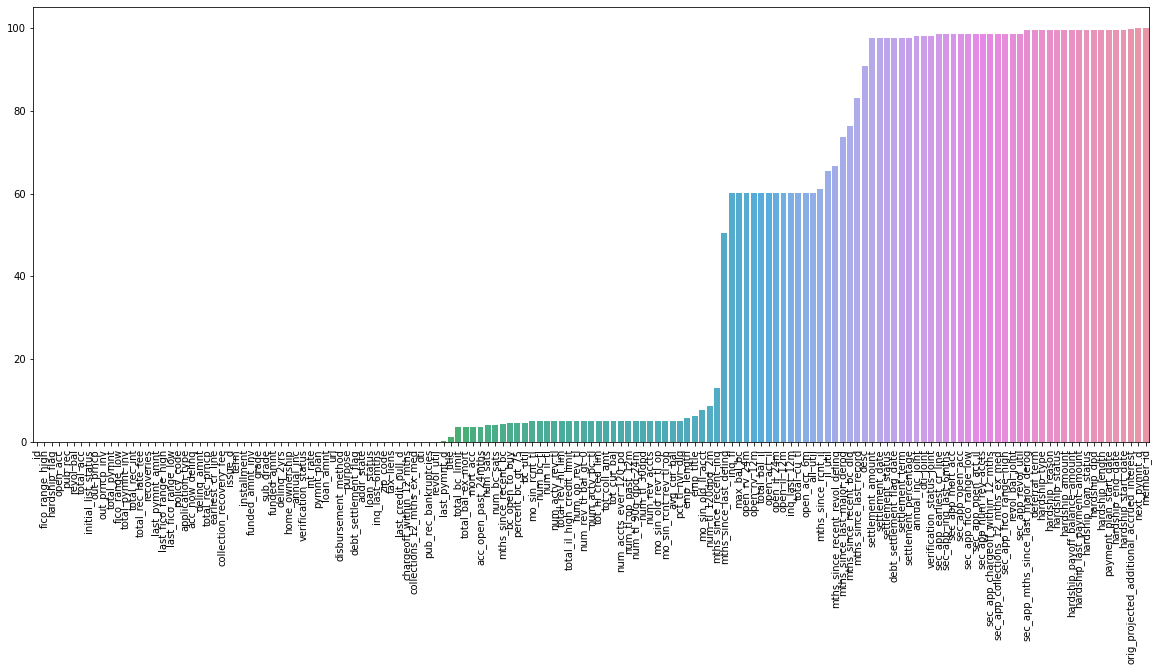

In [6]:
nullval_percentage = (eda.df.isnull().sum()/len(eda.df))*100
plt.figure(figsize=(20,8)) 
sns.barplot(y=nullval_percentage.sort_values(), x=nullval_percentage.sort_values().index) 
plt.xticks(rotation=90);

<font color = "steelblue">We can see above that the number of missing values reaches upto 100% in the case of member_id.</font> <font color = "darkblue"> To deal with this we can possibly remove the null values above a certain threshold.</font><font color = "steelblue"> Attributes with more than </font><font color = "darkblue"><b>40%</b></font><font color = "steelblue"> null values should be removed as such attributes won't be able to give a real idea of people's records plus it is difficult to fill the null values in a way that will reflect a real-world dataset.

In [7]:
new_df = eda.rem_percent_missing(percent=40)
print(new_df.shape)
print(new_df.columns)

(1345310, 93)
Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_pa

<font color = "steelblue">We have 93 attributes now. Lets look at the datatype distribution below:

In [8]:
new_df.dtypes.value_counts()

float64    69
object     24
dtype: int64

<font color = "steelblue">There are a lot of attributes whose use I am unable to grasp and hence, don't provide clarity. Better to not explore these attributes. Choosing the following based on understanding:

In [9]:
features_used = ['annual_inc', 'earliest_cr_line', 'emp_length', 'emp_title', 'term', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'application_type',
                    'purpose', 'initial_list_status', 'loan_status', 'total_acc', 'verification_status', 'addr_state', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 
                    'revol_util', 'revol_bal', 'sub_grade','int_rate', 'title']

In [10]:
eda.update_df(new_df[features_used])
eda.df.shape

(1345310, 28)

<font color = "steelblue">Lets get the correlation

In [11]:
temp_df = eda.df.copy() 
temp_df['loan_status'] = pd.get_dummies(temp_df['loan_status'], drop_first=True)
temp_df.head()

,annual_inc,earliest_cr_line,emp_length,emp_title,term,fico_range_high,fico_range_low,grade,home_ownership,application_type,purpose,initial_list_status,loan_status,total_acc,verification_status,addr_state,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_util,revol_bal,sub_grade,int_rate,title
0,55000.0,Aug-2003,10+ years,leadman,36 months,679.0,675.0,C,MORTGAGE,Individual,debt_consolidation,w,1,13.0,Not Verified,PA,3600.0,2.0,1.0,144904.0,7.0,0.0,0.0,29.7,2765.0,C4,13.99,Debt consolidation
1,65000.0,Dec-1999,10+ years,Engineer,36 months,719.0,715.0,C,MORTGAGE,Individual,small_business,w,1,38.0,Not Verified,SD,24700.0,5.0,4.0,204396.0,22.0,0.0,0.0,19.2,21470.0,C1,11.99,Business
2,63000.0,Aug-2000,10+ years,truck driver,60 months,699.0,695.0,B,MORTGAGE,Joint App,home_improvement,w,1,18.0,Not Verified,IL,20000.0,2.0,5.0,189699.0,6.0,0.0,0.0,56.2,7869.0,B4,10.78,NaN
4,104433.0,Jun-1998,3 years,Contract Specialist,60 months,699.0,695.0,F,MORTGAGE,Individual,major_purchase,w,1,35.0,Source Verified,PA,10400.0,4.0,6.0,331730.0,12.0,0.0,0.0,64.5,21929.0,F1,22.45,Major purchase
5,34000.0,Oct-1987,4 years,Veterinary Tecnician,36 months,694.0,690.0,C,RENT,Individual,debt_consolidation,w,1,6.0,Source Verified,GA,11950.0,2.0,0.0,12798.0,5.0,0.0,0.0,68.4,8822.0,C3,13.44,Debt consolidation


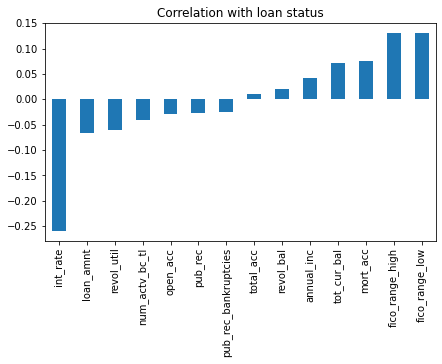

In [12]:
plt.figure(figsize=(7,4))
corr = temp_df.corr()['loan_status'].sort_values().drop('loan_status')
corr.plot(kind='bar') 
plt.title("Correlation with loan status")
plt.xticks(rotation=90); 

In [13]:
eda.percent_missing()

emp_length              5.835904
emp_title               6.376597
num_actv_bc_tl          5.019438
mort_acc                3.514506
tot_cur_bal             5.019438
pub_rec_bankruptcies    0.051810
revol_util              0.063703
title                   1.238302
dtype: float64

##  <font color="steelblue">2.1 addr_state <a id="2.1"></a>

<font color = "darkblue">State where the borrower resides

In [14]:
eda.addr_state()

Missing values NOT found
CA    196528
TX    110169
NY    109842
FL     95606
IL     51720
NJ     48449
PA     45522
OH     43842
GA     43376
VA     38040
NC     37784
MI     35234
AZ     32695
MD     31227
MA     30977
CO     29671
WA     29188
MN     23968
IN     21716
MO     21260
TN     20385
NV     20267
CT     19728
WI     17732
AL     16613
OR     16406
SC     15992
LA     15499
KY     12839
OK     12281
KS     11240
AR     10047
UT     10036
NM      7362
HI      6757
MS      6588
NH      6449
RI      5871
WV      4878
MT      3823
DE      3783
NE      3586
DC      3475
AK      3190
WY      2922
SD      2767
VT      2652
ME      2030
ID      1689
ND      1602
IA         7
Name: addr_state, dtype: int64


### <font color="darkgreen">Conclusion: Can convert these values to dummy variables 

## <font color="steelblue">2.2 annual_inc<a id="2.2"></a>

<font color = "darkblue">Annual income of the borrower

We can drop off the columns with annual_inc above 250000 as these are mostly outliers. Number of rows above 250000 {13447} 

Percentage of Customers with annual income more than 250000:  0.9995465729088463


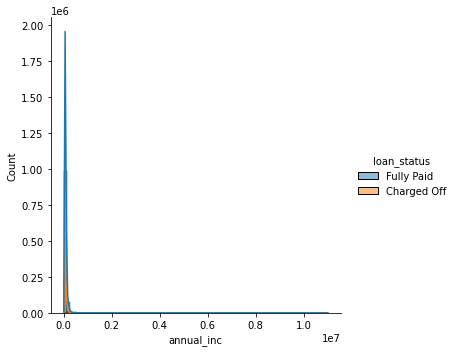

In [15]:
eda.annual_inc()

### <font color="darkgreen">Conclusion: Can remove the records above 25000 as thats only 1% of the records

## <font color="steelblue">2.3 earliest_cr_line<a id="2.3"></a>

<font color = "darkblue">Borrowers earliest reported credit line

In [16]:
eda.earliest_cr_line()

Missing values NOT found 

Dropping the month part and only keeping the year 

                 count         mean       std     min     25%     50%     75%  \
loan_status                                                                     
Charged Off   268559.0  1999.363689  7.579816  1944.0  1996.0  2001.0  2004.0   
Fully Paid   1076751.0  1998.525174  7.606118  1934.0  1995.0  2000.0  2004.0   

                max  
loan_status          
Charged Off  2015.0  
Fully Paid   2015.0  


### <font color="darkgreen">Conclusion: Customers who fully paid the loan had their credit line approximately 1 year before those who were charged off.

## <font color="steelblue">2.4 emp_length<a id="2.4"></a>

5.8359039923883715 

['10+ years' '3 years' '4 years' '6 years' '7 years' '8 years' '2 years'
 '5 years' '9 years' '< 1 year' '1 year' nan] 

AxesSubplot(0.125,0.125;0.775x0.755)


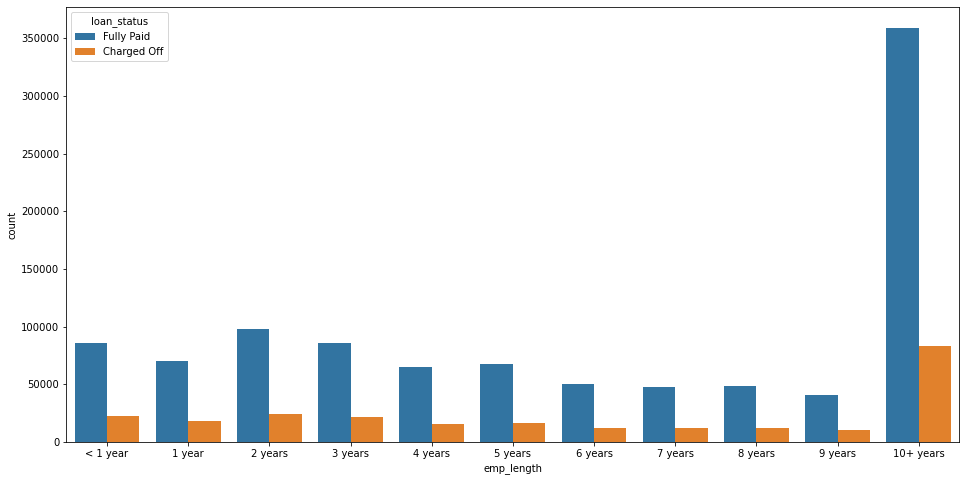

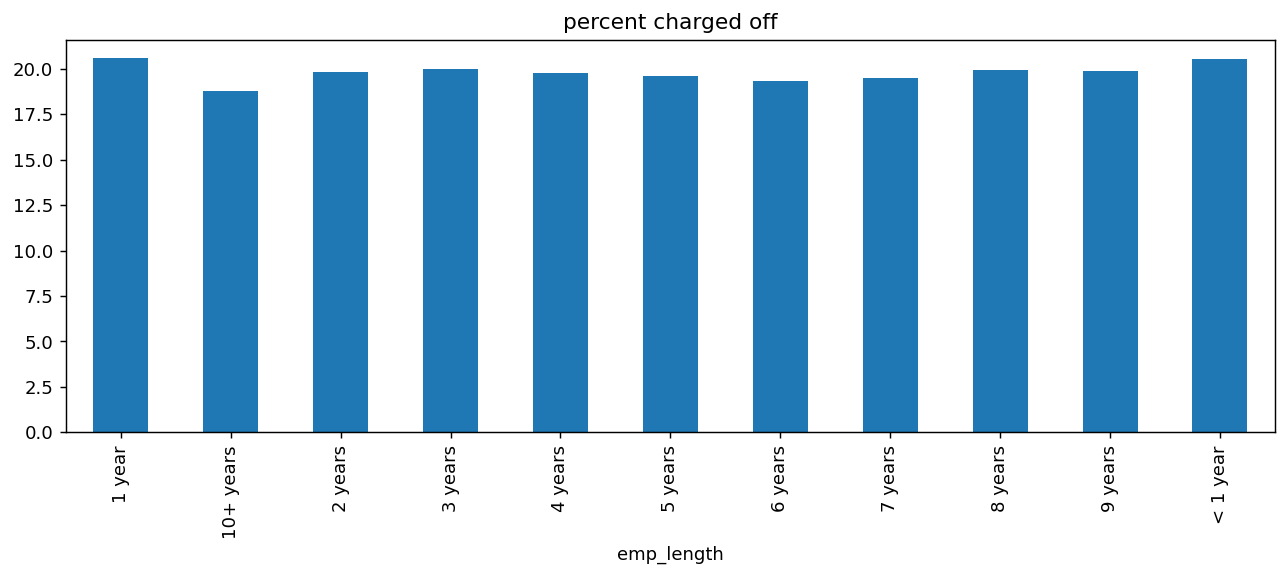

In [17]:
eda.emp_length()

### <font color="darkgreen">Conclusion: There isn't much difference between the percent charged off. Might not help in predicting defaulters. Can ignore this attribute.

## <font color="steelblue">2.5 emp_title<a id="2.5"></a>

In [18]:
eda.emp_title()

Percentage of missing values:  6.376597215511666 

count     1259525
unique     378353
top       Teacher
freq        21268
Name: emp_title, dtype: object


### <font color="darkgreen">Conclusion: Number of uniques is just too much. Can be removed as it might not help a lot in predicting about the defaulters.

## <font color="steelblue">2.6 grade and sub_grade <a id="2.6"></a>

<font color = "darkblue">Grades assigned to the borrower

sub_grade missing values:  Missing values NOT found
Grade missing values:  Missing values NOT found
AxesSubplot(0.125,0.125;0.775x0.755)


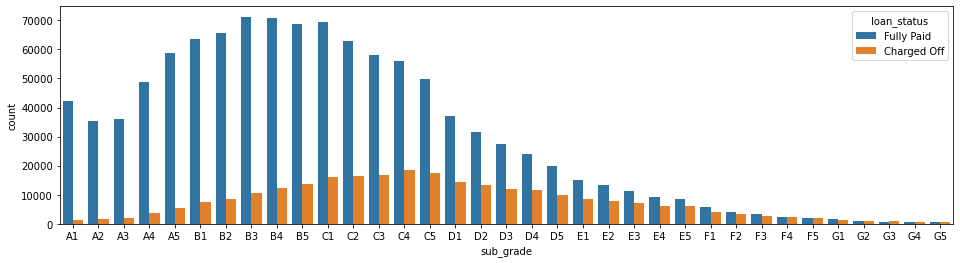

In [19]:
eda.grade_subgrade()

### <font color="darkgreen">Conclusion: Customers who don't payback have higher grade. Also, we can remove the grade and just keep the sub-grade as the information provided by grade is redundant.

## <font color="steelblue">2.7 fico_range_high and fico_range_low<a id="2.7"></a>

<font color = "darkblue">FICO score of the borrower

<font color="steelblue"> fico_high and low can be combined together as they have similar means and standard deviations.

fico_range_high missing values:  Missing values NOT found 

fico_range_low missing values:  Missing values NOT found 

count    1.345310e+06
mean     7.001852e+02
std      3.185316e+01
min      6.290000e+02
25%      6.740000e+02
50%      6.940000e+02
75%      7.140000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64 

count    1.345310e+06
mean     6.961850e+02
std      3.185251e+01
min      6.250000e+02
25%      6.700000e+02
50%      6.900000e+02
75%      7.100000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64 

AxesSubplot(0.125,0.125;0.775x0.755)
                 count        mean        std    min    25%    50%    75%  \
loan_status                                                                 
Charged Off   268559.0  689.850145  25.948737  662.0  672.0  682.0  702.0   
Fully Paid   1076751.0  700.263982  32.834008  627.0  677.0  692.0  717.0   

               max  
loan_status         
Charged Off  847.5  
Fully Paid   847.5  


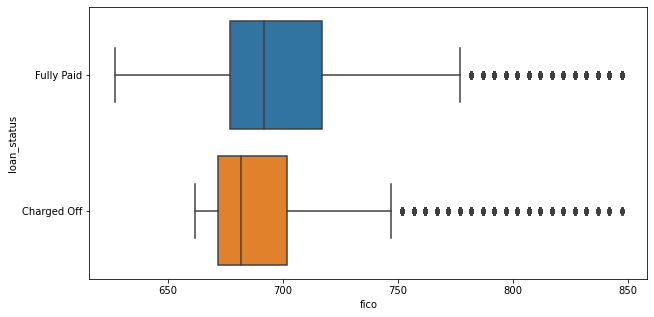

In [20]:
eda.fico_high_low()

### <font color="darkgreen">Conclusion: Considerable difference between the FICO score of people who paid the loan back and those who were charged off.

## <font color="steelblue">2.8 home_ownership<a id="2.8"></a>

<font color = "darkblue">Home ownership status of the borrower

Missing vals:  Missing values NOT found
Value Counts:  MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: home_ownership, dtype: int64 


 merging the two('ANY', 'OTHER') together into one('Both')

AxesSubplot(0.125,0.125;0.775x0.755) 



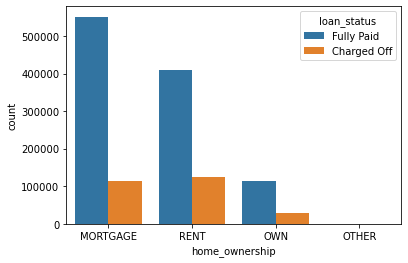

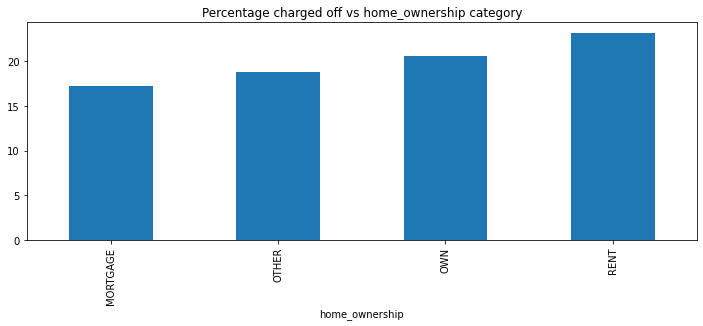

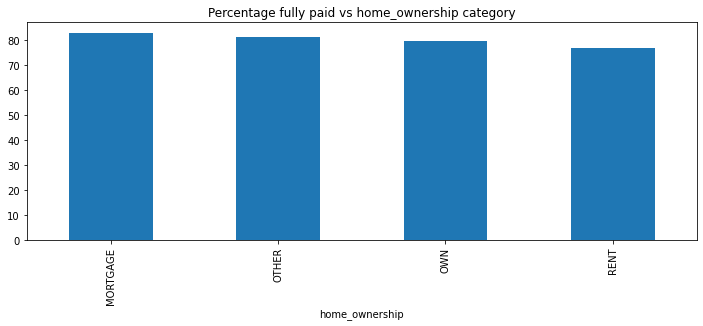

In [21]:
eda.home_ownership()

### <font color="darkgreen">Conclusion: Slight differences between the percentages. Can provide some help in the predicition. Keep this one and create dummies

## <font color="steelblue">2.9 application_type<a id="2.9"></a>

<font color = "darkblue">Individual or joint borrowers

missing vals:  Missing values NOT found 



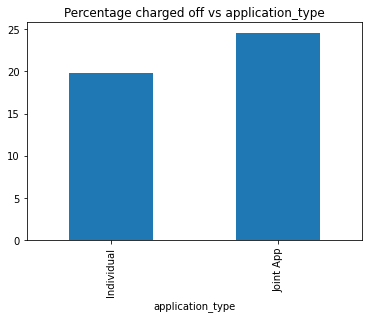

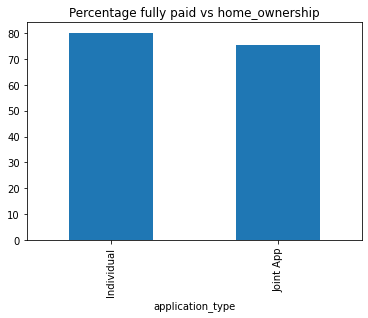

In [22]:
eda.application_type()

### <font color="darkgreen">Conclusion: Slight differences between the percentages. Can provide some help in the predicition. Keep this one and create dummy variables

## <font color="steelblue">2.10 initial_list_status<a id="2.10"></a>

<font color = "darkblue">Listing status of the loan

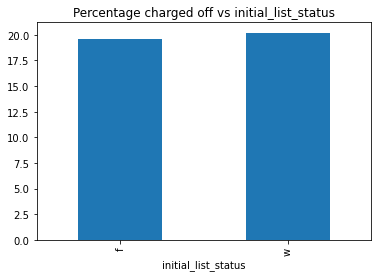

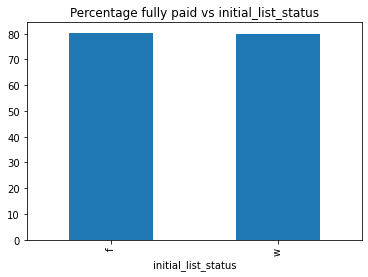

In [23]:
eda.initial_list()

### <font color="darkgreen">Conclusion: Similar for fully paid and charged off. Can be dropped.

## <font color="steelblue">2.11 int_rate<a id="2.11"></a>

<font color = "darkblue">Interest rate of the loan

Missing vals:  Missing values NOT found 

                 count       mean       std   min    25%    50%    75%    max
loan_status                                                                  
Charged Off   268559.0  15.710714  4.910387  5.31  12.29  15.05  18.55  30.99
Fully Paid   1076751.0  12.623288  4.527227  5.31   9.17  12.23  15.31  30.99 



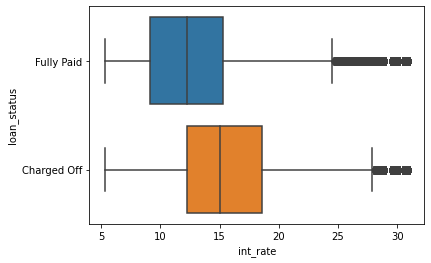

In [24]:
eda.int_rate()

### <font color="darkgreen">Conclusion: Can be pretty useful. Clear difference between the mean values here.

## <font color="steelblue"> 2.12 loan_amt<a id="2.12"></a>

<font color = "darkblue">Loan amount applied for by the borrower

Missing vals:  Missing values NOT found


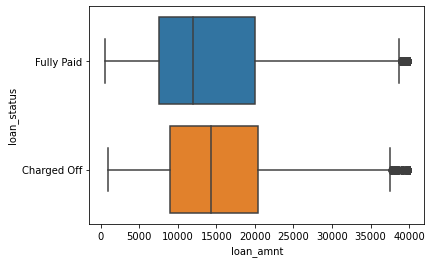

In [25]:
eda.loan_amnt()

### <font color="darkgreen">Conclusion: Useful attribute, clear difference between the mean values.

## <font color="steelblue"> 2.13 num_actv_bc_tl<a id="2.13"></a>

<font color = "darkblue">Currently active backcard accounts

Missing vals:  5.0194378990715895 

count    1.277783e+06
mean     3.642732e+00
std      2.248239e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      3.500000e+01
Name: num_actv_bc_tl, dtype: float64 

                 count      mean       std  min  25%  50%  75%   max
loan_status                                                         
Charged Off   268559.0  3.835142  2.321319  0.0  2.0  3.0  5.0  30.0
Fully Paid   1076751.0  3.617147  2.156946  0.0  2.0  3.0  5.0  35.0 

                 count      mean       std  min  25%  50%  75%  max
loan_status                                                        
Charged Off   261656.0  3.630129  1.943567  0.0  2.0  3.0  5.0  9.0
Fully Paid   1057009.0  3.468753  1.858022  0.0  2.0  3.0  4.0  9.0 

AxesSubplot(0.125,0.125;0.775x0.755) 



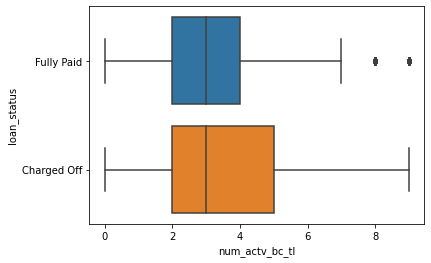

In [26]:
eda.bnkcrd_acts()

### <font color="darkgreen">Conclusion: Minute difference, we can keep this one.

## <font color="steelblue"> 2.14 mort_acc<a id="2.14"></a>

<font color = "darkblue">Number of mortgage accounts

Missing vals:  3.5855202041458596 

count    1.271384e+06
mean     1.666021e+00
std      1.997209e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.100000e+01
Name: mort_acc, dtype: float64 

Replacing with the mean value
                 count      mean       std  min  25%  50%  75%   max
loan_status                                                         
Charged Off   261656.0  1.374286  1.797449  0.0  0.0  1.0  2.0  29.0
Fully Paid   1057009.0  1.738238  1.992933  0.0  0.0  1.0  3.0  51.0 

AxesSubplot(0.125,0.125;0.775x0.755)


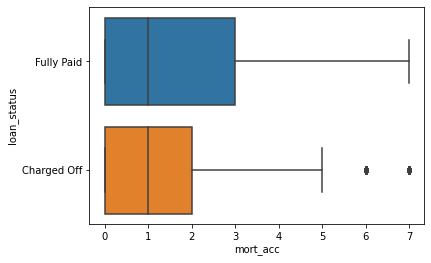

In [27]:
eda.mort_acc()

### <font color="darkgreen">Conclusion: Minute difference, we can keep this one.

## <font color="steelblue"> 2.15 total_acc<a id="2.15"></a>

<font color = "darkblue">Number of credit lines

Missing vals:  Missing values NOT found 



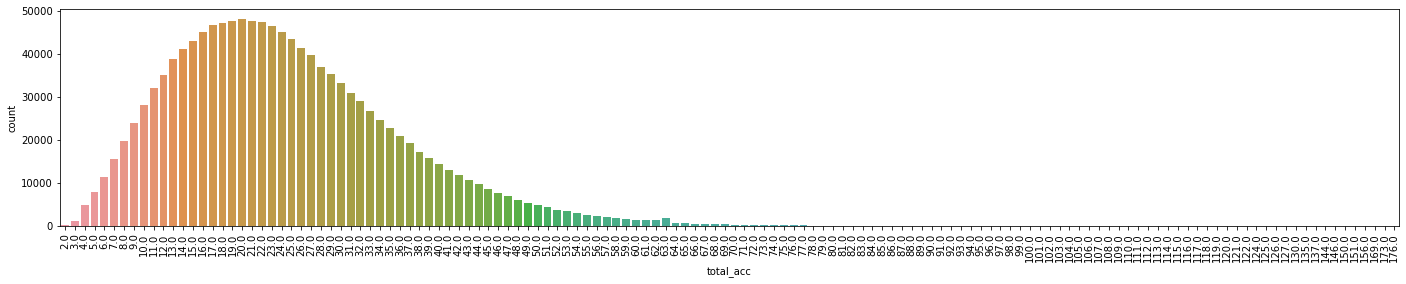

                 count       mean        std  min   25%   50%   75%   max
loan_status                                                              
Charged Off   256701.0  23.783234  10.956866  2.0  16.0  22.0  31.0  59.0
Fully Paid   1031671.0  24.169686  10.894999  2.0  16.0  23.0  31.0  59.0


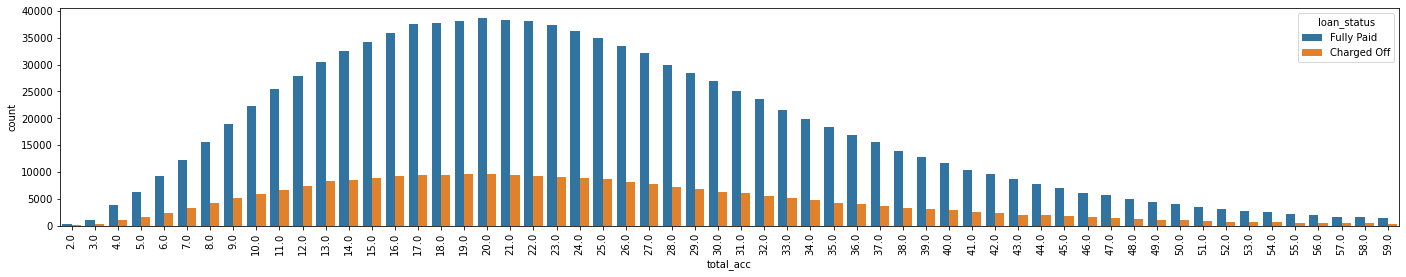

In [28]:
eda.total_acc()

### <font color="darkgreen">Conclusion: Difference in the mean, we can keep this feature.

## <font color="steelblue"> 2.16 tot_cur_bal<a id="2.16"></a>

<font color = "darkblue">Total current balance of all accounts

Missing vals:  5.1808794354425585 

count    1.221623e+06
mean     1.357353e+05
std      1.505839e+05
min      0.000000e+00
25%      2.861300e+04
50%      7.581400e+04
75%      2.035190e+05
max      5.445012e+06
Name: tot_cur_bal, dtype: float64 

Filling the NULL values  



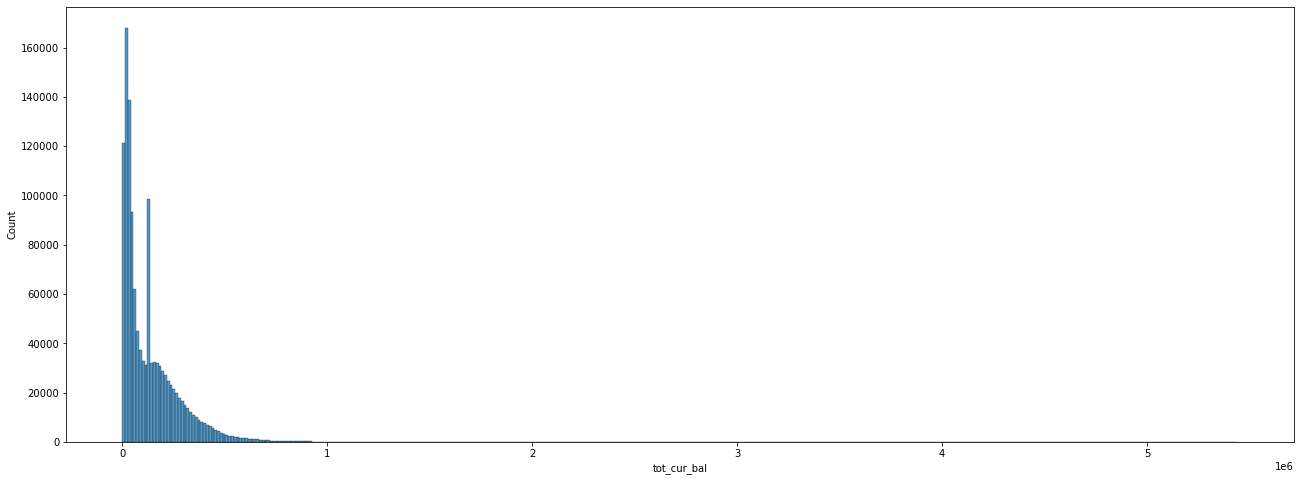

                 count           mean            std  min      25%      50%  \
loan_status                                                                   
Charged Off   256511.0  114666.327656  122884.575211  0.0  27677.5  63496.0   
Fully Paid   1029713.0  138476.881899  140133.499792  0.0  30764.0  95329.0   

                  75%       max  
loan_status                      
Charged Off  162543.0  999823.0  
Fully Paid   202537.0  999950.0  


In [29]:
eda.tot_cur_bal()

### <font color="darkgreen">Conclusion: After filling the null values and removing the outliers, the mean value for fully paid is higher than charged off 

## <font color="steelblue"> 2.17 open_acc<a id="2.17"></a>

<font color = "darkblue">number of open credit lines

Missing vals:  Missing values NOT found 

                 count       mean       std  min  25%   50%   75%   max
loan_status                                                            
Charged Off   256511.0  11.475161  5.107283  0.0  8.0  11.0  14.0  49.0
Fully Paid   1029713.0  11.155610  4.960834  0.0  8.0  10.0  14.0  52.0


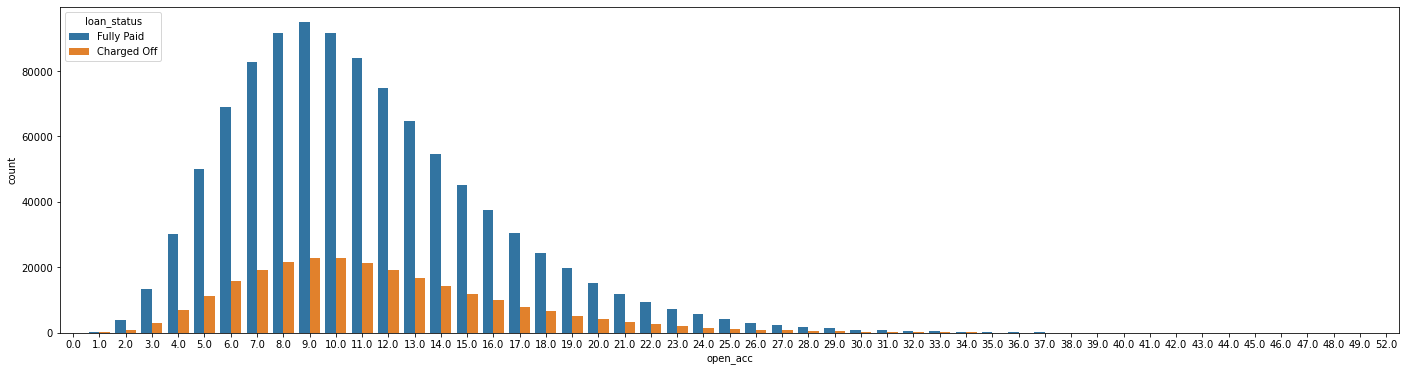

In [30]:
eda.open_acc()

### <font color="darkgreen">Conclusion: Minute difference between the mean 

## <font color="steelblue"> 2.18 pub_rec<a id="2.18"></a>

<font color = "darkblue">Number of derogatory public records.

Missing vals:  Missing values NOT found 



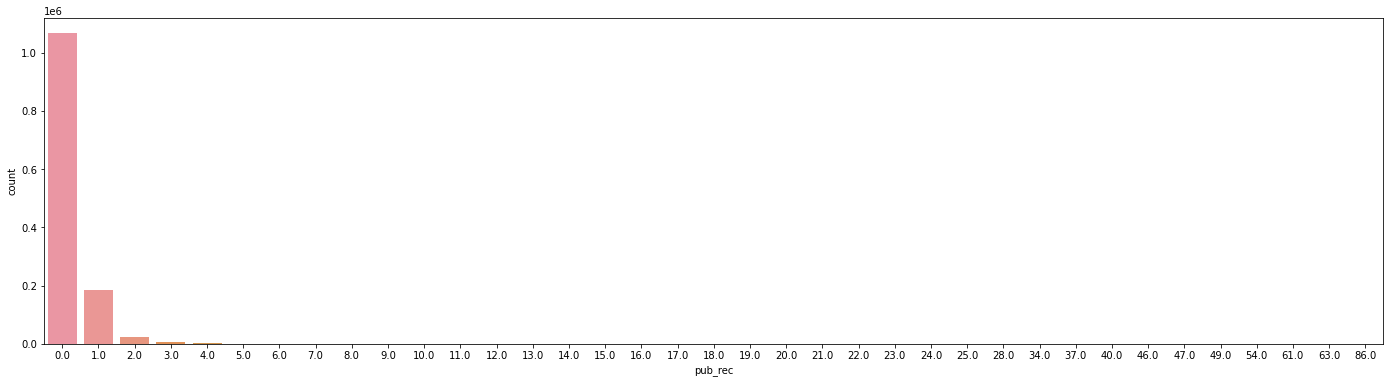

                 count      mean       std  min  25%  50%  75%  max
loan_status                                                        
Charged Off   253707.0  0.207472  0.456293  0.0  0.0  0.0  0.0  2.0
Fully Paid   1020358.0  0.174788  0.423519  0.0  0.0  0.0  0.0  2.0


In [31]:
eda.pub_rec()

### <font color="darkgreen">Conclusion: Minute difference between the mean. Can keep this one.


## <font color="steelblue"> 2.19 purpose<a id="2.19"></a>

<font color = "darkblue">Purpose for the loan

Missing vals:  Missing values NOT found 



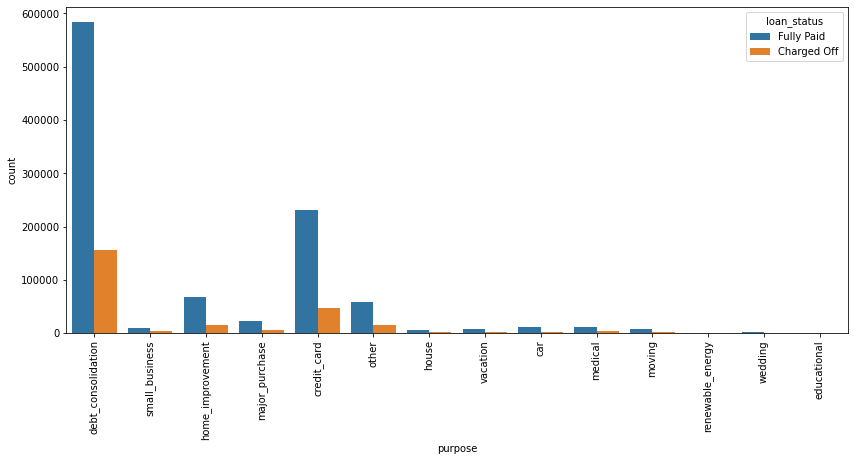

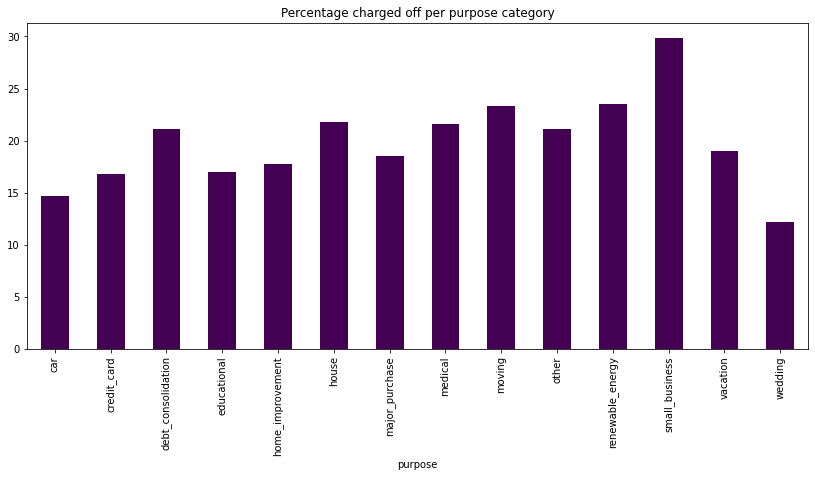

In [32]:
eda.purpose()

### <font color="darkgreen">Conclusion: Differences in percentages, can create dummies for these.


## <font color="steelblue">2.20 term<a id="2.20"></a>

<font color = "darkblue">Term plan for the loan

Missing vals:  Missing values NOT found 



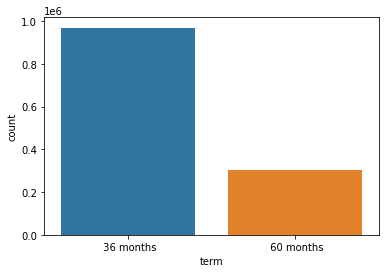

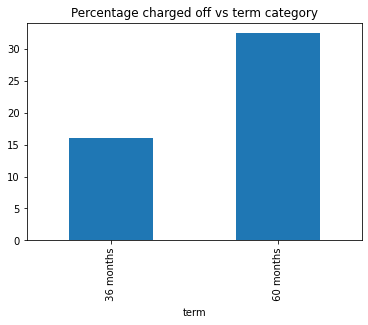

In [33]:
eda.term()

### <font color="darkgreen">Conclusion: Borrowers with 60 months loan term had double the chance of charging off

## <font color="steelblue">2.21 Title<a id="2.21"></a>

<font color = "darkblue">Loan title

In [34]:
eda.title()

1.2398896445628755
unique values:  60027


### <font color="darkgreen">Conclusion: Lot of unique values, this feature should be dropped

## <font color="steelblue">2.22 revol_bal<a id="2.22"></a>

<font color = "darkblue">Total credit revolving balance.

Missing vals:  Missing values NOT found
check what percentage is that
0.7925812262325705
                 count          mean           std  min     25%      50%  \
loan_status                                                                
Charged Off   253707.0  14638.339801  16693.564541  0.0  5860.0  10774.0   
Fully Paid   1020358.0  15589.580955  19281.261553  0.0  5827.0  10881.0   

                 75%       max  
loan_status                     
Charged Off  18378.0  867528.0  
Fully Paid   19208.0  921464.0  


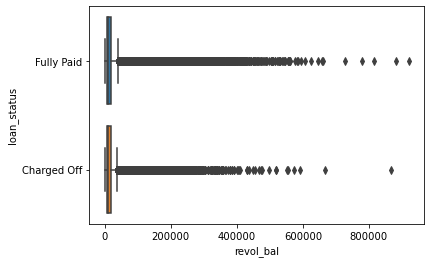

In [35]:
eda.revol_bal()

### <font color="darkgreen">Conclusion: We can drop the outliers (>100000)

## <font color="steelblue">2.23 revol_util<a id="2.23"></a>

<font color = "darkblue">amount of credit the borrower is using relative to all available revolving credit.

Missing vals:  0.06467487922515727 



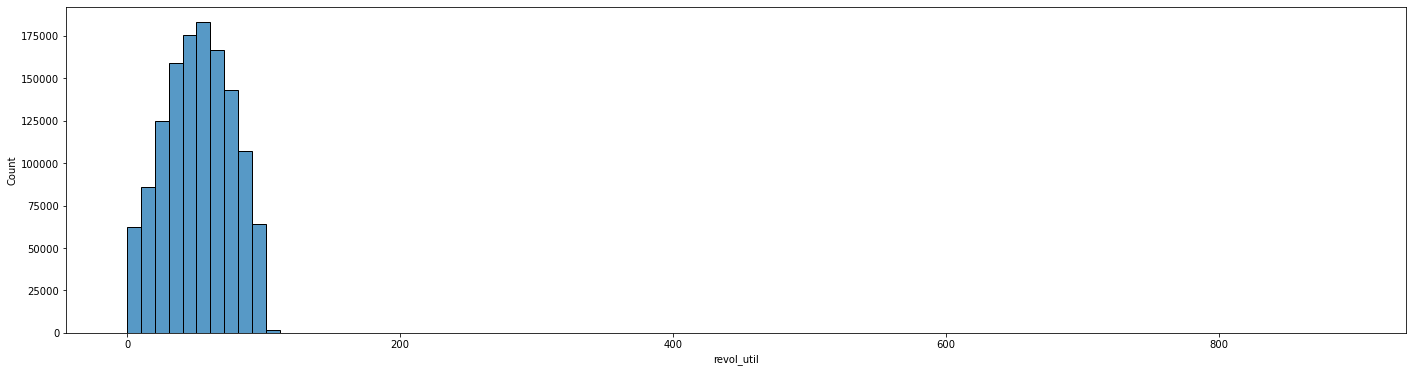

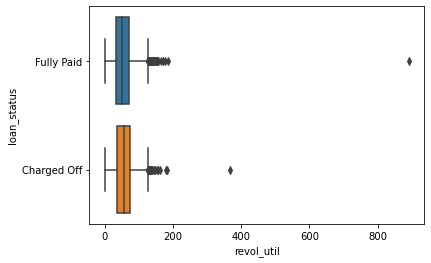

                 count       mean        std  min   25%   50%   75%    max
loan_status                                                               
Charged Off   253707.0  54.832246  23.932715  0.0  37.4  55.6  73.2  366.6
Fully Paid   1020358.0  51.138646  24.655430  0.0  32.6  51.4  70.2  892.3


In [36]:
eda.revol_util()

### <font color="darkgreen">Conclusion: Difference in the mean values for charged_off and fully paid

## <font color="steelblue">2.24 verification_status<a id="2.24"></a>

<font color = "darkblue">if income is verified.

Missing vals:  Missing values NOT found 

Source Verified    493678
Verified           391159
Not Verified       389228
Name: verification_status, dtype: int64


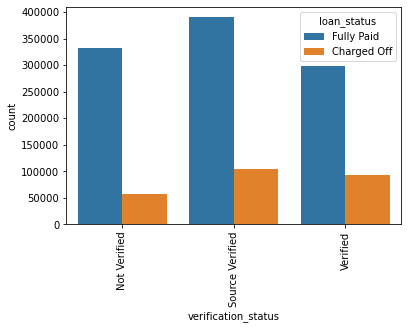

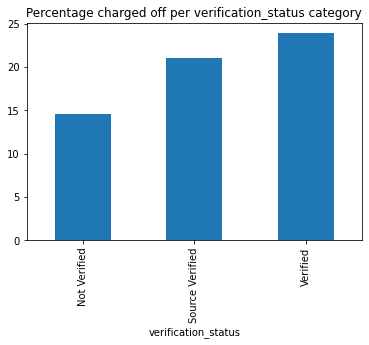

In [37]:
eda.verification_status()

### <font color="darkgreen">Conclusion: Difference in the percentages charged off. Create dummies to use it in the model.

## <font color="darkorange"> FINAL CONCLUSION: <a id="3"></a>

### <font color="darkred">Since, the dataset has a lot of features, it is essential to choose the best features to reduce the training time for the model and prediction. The features selected have diverse values which will help the model in learning faster.